In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from scipy.stats import iqr

In [34]:
#Read files with numpy
data_body_x = np.loadtxt("Signals/body_acc_x_test.txt")
data_body_y = np.loadtxt("Signals/body_acc_y_train.txt")
data_body_z = np.loadtxt("Signals/body_acc_z_train.txt")
data_body_gyro_x = np.loadtxt("Signals/body_gyro_x_train.txt")
data_body_gyro_y  = np.loadtxt("Signals/body_gyro_y_train.txt")
data_body_gyro_z  = np.loadtxt("Signals/body_gyro_z_train.txt")
data_total_acc_x = np.loadtxt("Signals/total_acc_x_train.txt")
data_total_acc_y  = np.loadtxt("Signals/total_acc_y_train.txt")
data_total_acc_z  = np.loadtxt("Signals/total_acc_z_train.txt")
data_body_test_x = np.loadtxt("Signals/body_acc_x_test.txt")
data_body_test_y = np.loadtxt("Signals/body_acc_y_test.txt")
data_body_test_z = np.loadtxt("Signals/body_acc_z_test.txt")
data_body_gyro_test_x = np.loadtxt("Signals/body_gyro_x_test.txt")
data_body_gyro_test_y  = np.loadtxt("Signals/body_gyro_y_test.txt")
data_body_gyro_test_z  = np.loadtxt("Signals/body_gyro_z_test.txt")
data_total_acc_test_x = np.loadtxt("Signals/total_acc_x_test.txt")
data_total_acc_test_y  = np.loadtxt("Signals/total_acc_y_test.txt")
data_total_acc_test_z  = np.loadtxt("Signals/total_acc_z_test.txt")

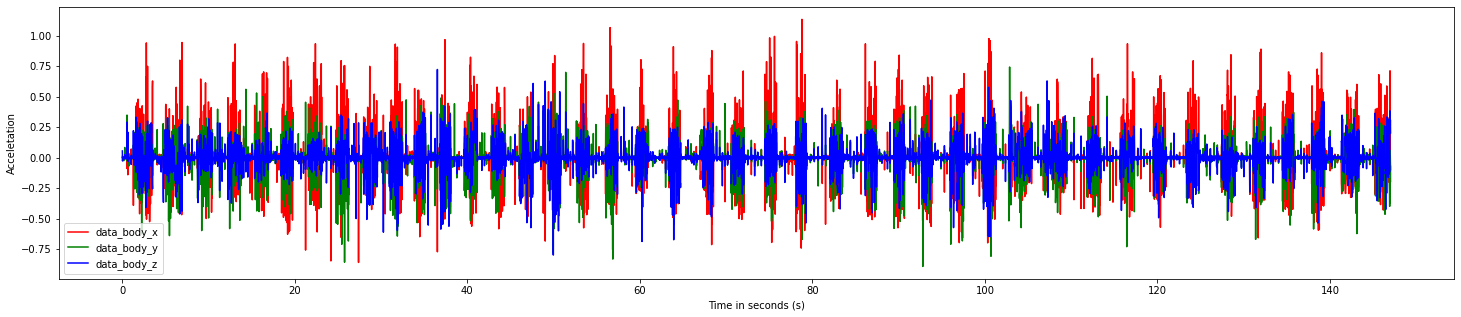

In [23]:
#Data_body visualization

len_df=len(data_body_x)   
# converting row numbers into time duration (the duration between two rows is 1/50=0.02 second)
time=[1/float(50) *j for j in range(len_df)] 
# Define the figure and setting dimensions width and height
plt.figure(figsize=(25,5))
# ploting each signal component
plt.plot(time,data_body_x[:,0:1],color='red',label='data_body_x') 
plt.plot(time,data_body_y[:,0:1],color='green',label='data_body_y')
plt.plot(time,data_body_z[:,0:1],color='blue',label='data_body_z')
plt.ylabel("Acceletation")
plt.xlabel('Time in seconds (s)')
plt.legend(loc="lower left")
    
plt.show()


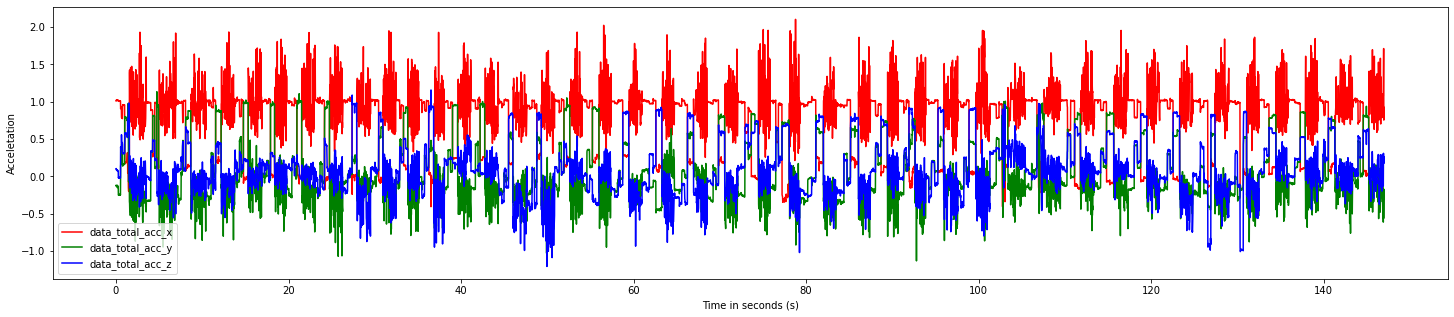

In [48]:
#Data_total_acc_visualization

len_df=len(data_total_acc_x)  
# converting row numbers into time (the duration between two rows is 1/50=0.02 second)
time=[1/float(50) *j for j in range(len_df)]
# Define the figure and setting dimensions width and height
plt.figure(figsize=(25,5))
# ploting each signal component
plt.plot(time,data_total_acc_x[:,0:1],color='red',label='data_total_acc_x')
plt.plot(time,data_total_acc_y[:,0:1],color='green',label='data_total_acc_y')
plt.plot(time,data_total_acc_z[:,0:1],color='blue',label='data_total_acc_z')
plt.ylabel("Acceletation")
plt.xlabel('Time in seconds (s)')
plt.legend(loc="lower left")
    
plt.show()

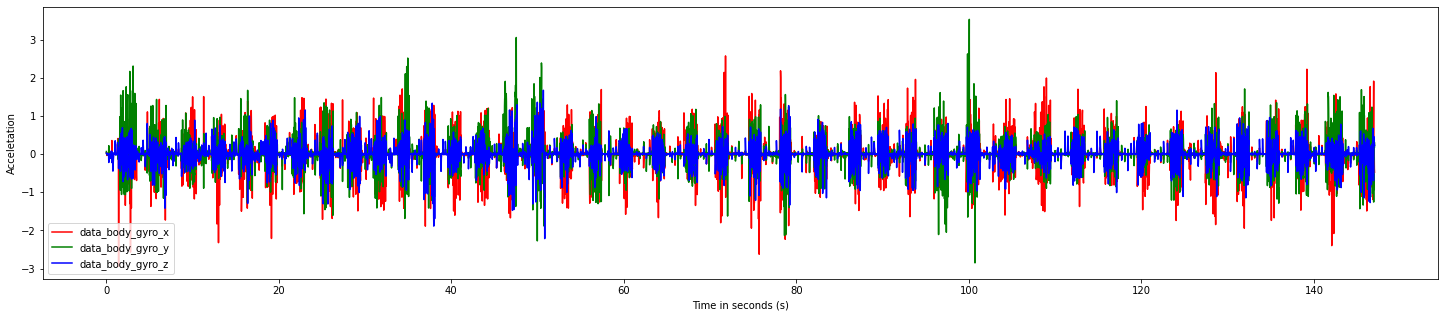

In [22]:
#Data_body_gyro visualization

len_df=len(data_body_gyro_x)
# converting row numbers into time duration (the duration between two rows is 1/50=0.02 second)
time=[1/float(50) *j for j in range(len_df)]
# Define the figure and setting dimensions width and height
plt.figure(figsize=(25,5))
# ploting each signal component
plt.plot(time,data_body_gyro_x[:,0:1],color='red',label='data_body_gyro_x') 
plt.plot(time,data_body_gyro_y[:,0:1],color='green',label='data_body_gyro_y')
plt.plot(time,data_body_gyro_z[:,0:1],color='blue',label='data_body_gyro_z')
plt.ylabel("Acceletation")
plt.xlabel('Time in seconds (s)') 
plt.legend(loc="lower left")
    
plt.show()

/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.002s...
[t-SNE] Computed neighbors for 7351 samples in 1.167s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.497456
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 124.3433228, gradient norm = 0.0171090 (50 iterations in 2.617s)
[t-SNE] Iteration 100: error = 107.4960251, gradient norm = 0.0273130 (50 iterations in 1.567s)
[t-SNE] Iteration 150: error = 101.2363586, gradient norm =

/home/okan/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


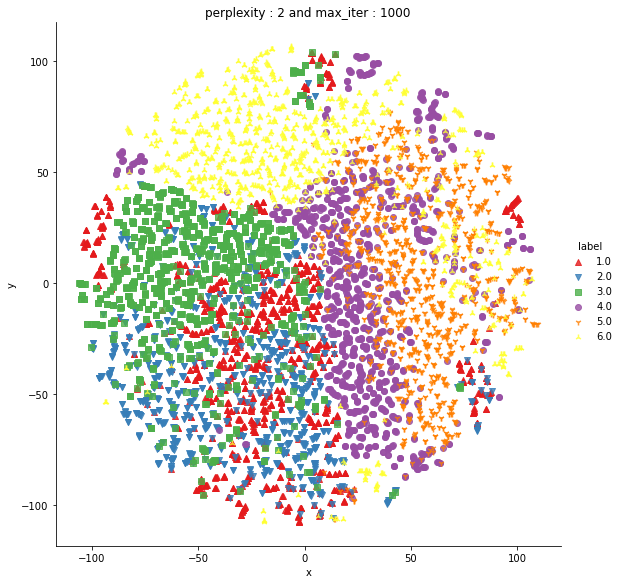

Done
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.825574
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 113.7886887, gradient norm = 0.0149214 (50 iterations in 2.671s)
[t-SNE] Iteration 100: error = 97.1870270, gradient norm = 0.0130651 (50 iterations in 1.781s)
[t-SNE] Iteration 150: error = 93.4499741, gradient norm = 0.0067773 (50 iterations in 1.820s)
[t-SNE] Iteration 200: error = 91.9933929, gradi

/home/okan/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


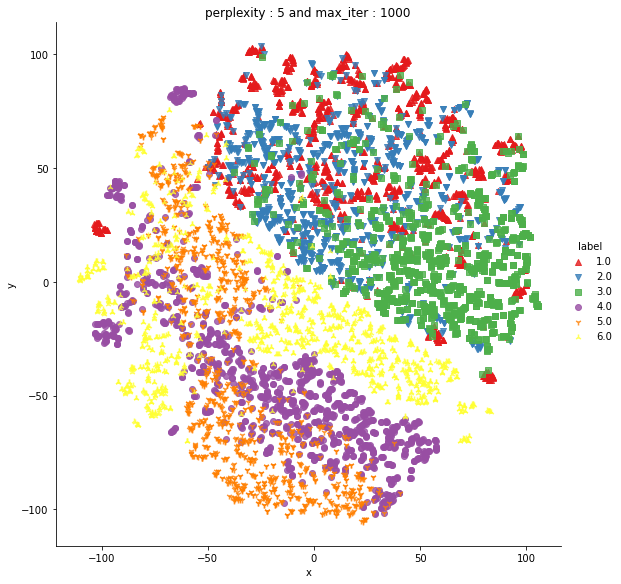

Done
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.002s...


/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.004644
[t-SNE] Computed conditional probabilities in 0.123s
[t-SNE] Iteration 50: error = 105.2917480, gradient norm = 0.0194773 (50 iterations in 3.566s)
[t-SNE] Iteration 100: error = 89.7641830, gradient norm = 0.0086767 (50 iterations in 4.530s)
[t-SNE] Iteration 150: error = 87.0373840, gradient norm = 0.0044160 (50 iterations in 5.604s)
[t-SNE] Iteration 200: error = 86.2268753, gradi

/home/okan/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


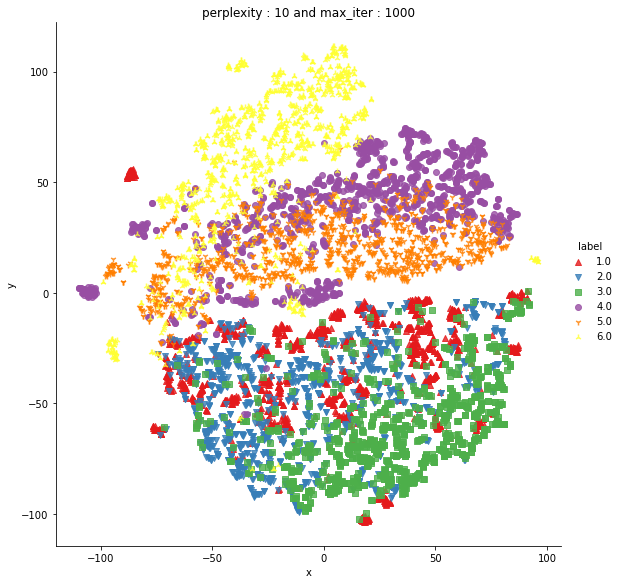

Done
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.002s...


/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 2.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.171170
[t-SNE] Computed conditional probabilities in 0.275s
[t-SNE] Iteration 50: error = 96.4663086, gradient norm = 0.0235876 (50 iterations in 4.029s)
[t-SNE] Iteration 100: error = 82.9282379, gradient norm = 0.0051706 (50 iterations in 4.472s)
[t-SNE] Iteration 150: error = 81.2055740, gradient norm = 0.0023886 (50 iterations in 4.449s)
[t-SNE] Iteration 200: error = 80.7346039, gradie

/home/okan/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


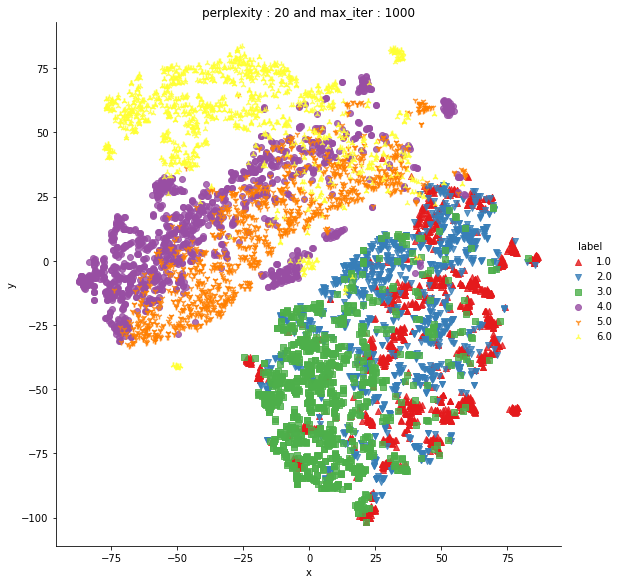

Done
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.002s...


/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 2.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.412861
[t-SNE] Computed conditional probabilities in 0.726s
[t-SNE] Iteration 50: error = 85.1248016, gradient norm = 0.0277888 (50 iterations in 5.874s)
[t-SNE] Iteration 100: error = 74.3688049, gradient norm = 0.0032329 (50 iterations in 5.789s)
[t-SNE] Iteration 150: error = 73.4433441, gradient norm = 0.0016629 (50 iterations in 7.127s)
[t-SNE] Iteration 200: error = 73.1523209, gradie

/home/okan/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


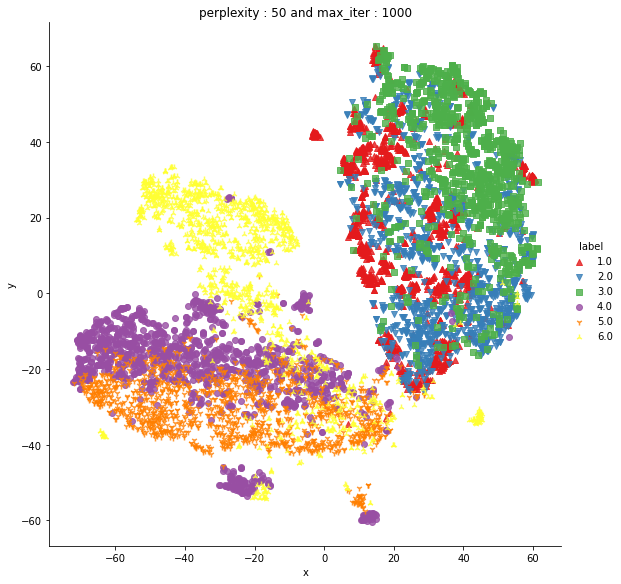

Done
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 2.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.656409
[t-SNE] Computed conditional probabilities in 1.279s
[t-SNE] Iteration 50: error = 75.5710297, gradient norm = 0.0357376 (50 iterations in 6.366s)
[t-SNE] Iteration 100: error = 67.9353027, gradient norm = 0.0023529 (50 iterations in 7.350s)
[t-SNE] Iteration 150: error = 67.2577972, gradient norm = 0.0015534 (50 iterations in 6.597s)
[t-SNE] Iteration 200: error = 67.0222015, gradie

/home/okan/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


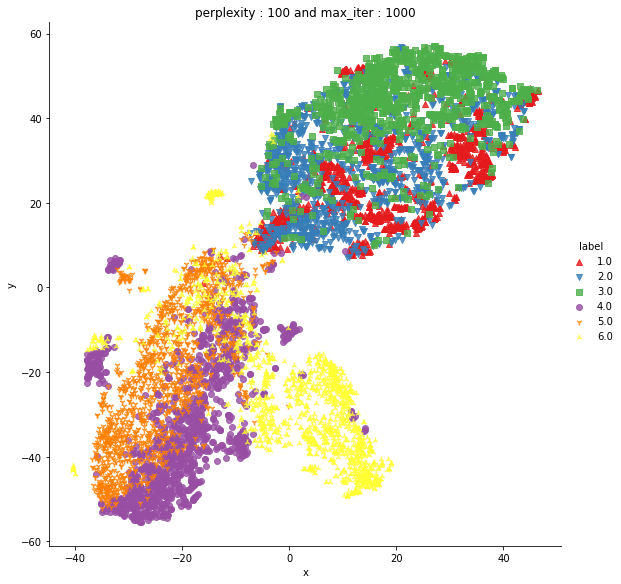

Done


In [29]:
from sklearn.manifold import TSNE
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne

        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)      
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        plt.show()
        print('Done')

perform_tsne(X_data = X_train,y_data=Y_train[:-1], perplexities =[2,5,10,20,50,100])

In [4]:
# Creating feature function
# Input: Inertial signal file

def featurecreator(a):

  df = pd.DataFrame(a)

  
  max1 = df.apply(lambda x : x.max(),axis=1)
  min1 = df.apply(lambda x : x.min(),axis=1)
  mean1 = df.apply(lambda x : x.mean(),axis=1)
  std1 = df.apply(lambda x : x.std(),axis=1)
  mad1 = df.apply(lambda x : x.mad(),axis=1)
  iqr1 = df.apply(lambda x : x.quantile(0.25),axis=1)
  sma1 = df.apply(lambda x : x.rolling(100).mean(),axis=1)
  sma1 = sma1.iloc[:,99:100]


  result = np.column_stack((max1,min1,mean1,std1,mad1,iqr1))
  return result

dt=0.02 # dt=1/50=0.02s time duration between two rows

def jerk_one_signal(signal): 
        return np.array([(signal[i+1]-signal[i])/dt for i in range(len(signal)-1)])

In [6]:
#Preparing train set with inertial signals
X_train = np.column_stack((featurecreator(jerk_one_signal(data_body_x)),featurecreator(jerk_one_signal(data_body_y)),featurecreator(jerk_one_signal(data_body_z)),
                          featurecreator(jerk_one_signal(data_body_gyro_x)),featurecreator(jerk_one_signal(data_body_gyro_y)),featurecreator(jerk_one_signal(data_body_gyro_z)),
                          featurecreator(jerk_one_signal(data_total_acc_x)),featurecreator(jerk_one_signal(data_total_acc_y)),featurecreator(jerk_one_signal(data_total_acc_z)),
                          featurecreator(data_body_x[:-1]),featurecreator(data_body_y[:-1]),featurecreator(data_body_z[:-1]),featurecreator(data_body_gyro_x[:-1]),featurecreator(data_body_gyro_y[:-1]),featurecreator(data_body_gyro_z[:-1]),
                          featurecreator(data_total_acc_x[:-1]),featurecreator(data_total_acc_y[:-1]),featurecreator(data_total_acc_z[:-1])))

#Preparing test set with inertial signals
X_test = np.column_stack((featurecreator(jerk_one_signal(data_body_test_x)),featurecreator(jerk_one_signal(data_body_test_y)),featurecreator(jerk_one_signal(data_body_test_z)),
                          featurecreator(jerk_one_signal(data_body_gyro_test_x)),featurecreator(jerk_one_signal(data_body_gyro_test_y)),featurecreator(jerk_one_signal(data_body_gyro_test_z)),
                          featurecreator(jerk_one_signal(data_total_acc_test_x)),featurecreator(jerk_one_signal(data_total_acc_test_y)),featurecreator(jerk_one_signal(data_total_acc_test_z)),
                          featurecreator(data_body_test_x[:-1]),featurecreator(data_body_test_y[:-1]),featurecreator(data_body_test_z[:-1]),
                          featurecreator(data_body_gyro_test_x[:-1]),featurecreator(data_body_gyro_test_y[:-1]),featurecreator(data_body_gyro_test_z[:-1]),
                          featurecreator(data_total_acc_test_x[:-1]),featurecreator(data_total_acc_test_y[:-1]),featurecreator(data_total_acc_test_z[:-1])))

Y_train = np.loadtxt("y_train.txt")
Y_test = np.loadtxt("y_test.txt")

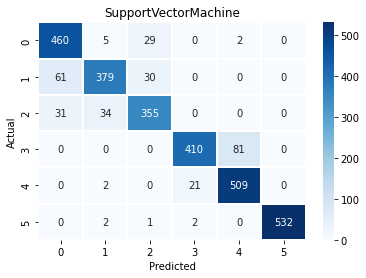

SVM

              precision    recall  f1-score   support

         1.0       0.83      0.93      0.88       496
         2.0       0.90      0.81      0.85       470
         3.0       0.86      0.85      0.85       420
         4.0       0.95      0.84      0.89       491
         5.0       0.86      0.96      0.91       532
         6.0       1.00      0.99      1.00       537

    accuracy                           0.90      2946
   macro avg       0.90      0.89      0.89      2946
weighted avg       0.90      0.90      0.90      2946



In [7]:
#Support Vector Machine

from sklearn.svm import SVC
svc = SVC(kernel="linear")
yyyy = Y_train
svc.fit(X_train,Y_train[:-1])
y_pred = svc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SupportVectorMachine")
plt.show()

from sklearn import metrics
print("SVM\n")
print(metrics.classification_report(Y_test[:-1], y_pred))

/home/okan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


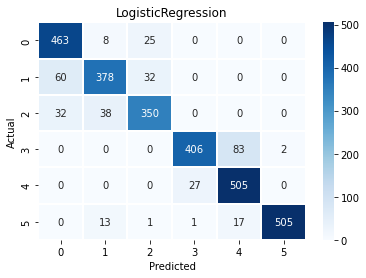

LogisticRegression

              precision    recall  f1-score   support

         1.0       0.83      0.93      0.88       496
         2.0       0.86      0.80      0.83       470
         3.0       0.86      0.83      0.85       420
         4.0       0.94      0.83      0.88       491
         5.0       0.83      0.95      0.89       532
         6.0       1.00      0.94      0.97       537

    accuracy                           0.88      2946
   macro avg       0.89      0.88      0.88      2946
weighted avg       0.89      0.88      0.88      2946



In [8]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1280)
logr.fit(X_train,Y_train[:-1])
Y_pred = logr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], Y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LogisticRegression")
plt.show()

from sklearn import metrics
print("LogisticRegression\n")
print(metrics.classification_report(Y_test[:-1], Y_pred))

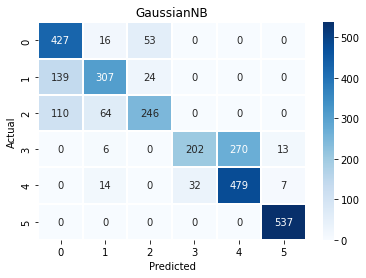

GaussianNB accuracy: 0.7460964019008826
              precision    recall  f1-score   support

         1.0       0.63      0.86      0.73       496
         2.0       0.75      0.65      0.70       470
         3.0       0.76      0.59      0.66       420
         4.0       0.86      0.41      0.56       491
         5.0       0.64      0.90      0.75       532
         6.0       0.96      1.00      0.98       537

    accuracy                           0.75      2946
   macro avg       0.77      0.74      0.73      2946
weighted avg       0.77      0.75      0.74      2946



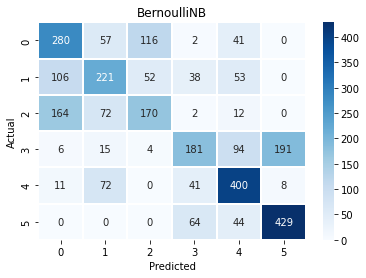

BernoullyNB accuracy :  0.5706042090970808
              precision    recall  f1-score   support

         1.0       0.49      0.56      0.53       496
         2.0       0.51      0.47      0.49       470
         3.0       0.50      0.40      0.45       420
         4.0       0.55      0.37      0.44       491
         5.0       0.62      0.75      0.68       532
         6.0       0.68      0.80      0.74       537

    accuracy                           0.57      2946
   macro avg       0.56      0.56      0.55      2946
weighted avg       0.56      0.57      0.56      2946



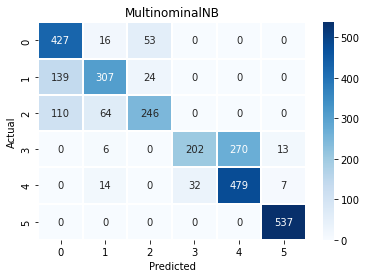

MultinominalNB accuracy :  0.6805838424983028
              precision    recall  f1-score   support

         1.0       0.46      0.60      0.52       496
         2.0       0.92      0.29      0.44       470
         3.0       0.50      0.73      0.59       420
         4.0       0.66      0.95      0.78       491
         5.0       0.88      0.54      0.67       532
         6.0       1.00      0.95      0.98       537

    accuracy                           0.68      2946
   macro avg       0.74      0.68      0.66      2946
weighted avg       0.75      0.68      0.67      2946



In [28]:
#MultinominalNB için girdiler 0-1 aralığına ölçeklenir
from sklearn import preprocessing
from sklearn import metrics
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(X_train)
x_test_scaled = min_max_scaler.fit_transform(X_test)

#GaussianNB model eğitimi
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train[:-1])
y_pred = gnb.predict(X_test)

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(X_train, Y_train[:-1])
y_predBNB = BNBclf.predict(X_test)

#MultinominalNB
from sklearn.naive_bayes import MultinomialNB
MNclf = MultinomialNB()
MNclf.fit(x_train_scaled, Y_train[:-1])
y_predMN = MNclf.predict(x_test_scaled)

#plot confusion matrix (GaussianNB)
from sklearn.metrics import confusion_matrix
cmGNB = confusion_matrix(Y_test[:-1], y_pred)
#plot confusion matrix (GaussianNB)
import seaborn as sns
sns.heatmap(cmGNB,annot=True,fmt="",cmap='Blues',linewidths=0.30)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GaussianNB")
plt.show()
dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("GaussianNB accuracy:",dogruluk)
print(metrics.classification_report(Y_test[:-1], y_pred))

##plot confusion matrix (BernoulliNB)
from sklearn.metrics import confusion_matrix
cmBNB = confusion_matrix(Y_test[:-1], y_predBNB)
#plot confusion matrix
import seaborn as sns
sns.heatmap(cmBNB,annot=True,fmt="",cmap='Blues',linewidths=0.30)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("BernoulliNB")
plt.show()
bnbaccuracy = metrics.accuracy_score(Y_test[:-1], y_predBNB)
print("BernoullyNB accuracy : ",bnbaccuracy)
print(metrics.classification_report(Y_test[:-1], y_predBNB))

##plot confusion matrix (MultinominalNB)
from sklearn.metrics import confusion_matrix
cmMN = confusion_matrix(Y_test[:-1], y_pred)
#plot confusion matrix
import seaborn as sns
sns.heatmap(cmMN,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MultinominalNB")
plt.show()
MNaccuracy = metrics.accuracy_score(Y_test[:-1], y_predMN)
print("MultinominalNB accuracy : ",MNaccuracy)
print(metrics.classification_report(Y_test[:-1], y_predMN))

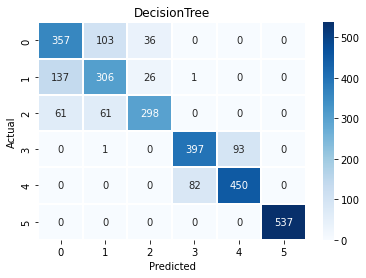

DecisionTree

              precision    recall  f1-score   support

         1.0       0.64      0.72      0.68       496
         2.0       0.65      0.65      0.65       470
         3.0       0.83      0.71      0.76       420
         4.0       0.83      0.81      0.82       491
         5.0       0.83      0.85      0.84       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.80      2946
   macro avg       0.80      0.79      0.79      2946
weighted avg       0.80      0.80      0.80      2946

Total accuracy: 0.7959945689069925


In [10]:
#DecisionTree model eğitimi
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(X_train,Y_train[:-1])

y_pred = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DecisionTree")
plt.show()

from sklearn import metrics
print("DecisionTree\n")
print(metrics.classification_report(Y_test[:-1], y_pred))
dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("Total accuracy:",dogruluk)

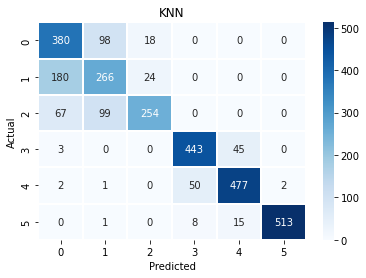

KNN

              precision    recall  f1-score   support

         1.0       0.60      0.77      0.67       496
         2.0       0.57      0.57      0.57       470
         3.0       0.86      0.60      0.71       420
         4.0       0.88      0.90      0.89       491
         5.0       0.89      0.90      0.89       532
         6.0       1.00      0.96      0.98       537

    accuracy                           0.79      2946
   macro avg       0.80      0.78      0.79      2946
weighted avg       0.80      0.79      0.79      2946

Total accuracy: 0.7919212491513917


0.7919212491513917

In [11]:
#KNN model eğitimi
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric="manhattan")
knn.fit(X_train,Y_train[:-1])

y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN")
plt.show()

from sklearn import metrics
print("KNN\n")
print(metrics.classification_report(Y_test[:-1], y_pred))
dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("Total accuracy:",dogruluk)
knn.score(X_test,Y_test[:-1])

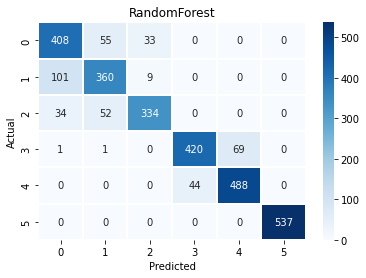

RandomForest

              precision    recall  f1-score   support

         1.0       0.75      0.82      0.78       496
         2.0       0.77      0.77      0.77       470
         3.0       0.89      0.80      0.84       420
         4.0       0.91      0.86      0.88       491
         5.0       0.88      0.92      0.90       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.86      0.86      0.86      2946
weighted avg       0.87      0.86      0.86      2946

Accuracy: 0.8645621181262729


In [12]:
#RANDOM FOREST model eğitimi
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=32,criterion="gini")
rfc.fit(X_train,Y_train[:-1])
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForest")
plt.show()

from sklearn import metrics
print("RandomForest\n")
print(metrics.classification_report(Y_test[:-1], y_pred))

dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("Accuracy:",dogruluk)
